# Importing the Libraries

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\sidhant\anaconda3\envs\digits_project\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sidhant\anaconda3\envs\digits_project\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sidhant\anaconda3\envs\digits_project\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sidha

In [2]:
from keras.datasets import mnist

# Preparing the Dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

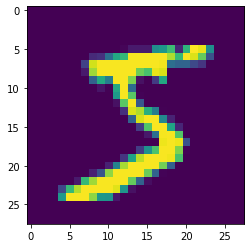

In [6]:
plt.imshow(X_train[0])

In [7]:
Y_train[0]

5

In [8]:
X_train = X_train/255.
X_test = X_test/255.

In [9]:
X_train = X_train.reshape([60000, 28, 28, 1])
X_test = X_test.reshape([10000, 28, 28, 1])

In [10]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Making the CNN model

In [12]:
model = tf.keras.Sequential()

In [13]:
model.add(tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu', input_shape=[28, 28, 1]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3)))

In [15]:
model.add(tf.keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'))

In [16]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3)))

In [17]:
model.add(tf.keras.layers.Flatten())

In [18]:
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))

In [19]:
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [20]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Dataset

In [22]:
batch_size_ = 128
epochs_ = 10

In [23]:
model.fit(X_train, Y_train, batch_size=batch_size_, epochs=epochs_, 
         validation_data = (X_test, Y_test))
print('Model has trained')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.2153 - acc: 0.9320 - val_loss: 0.0562 - val_acc: 0.9821
Epoch 2/10
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0501 - acc: 0.9843 - val_loss: 0.0426 - val_acc: 0.9868
Epoch 3/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0381 - acc: 0.9877 - val_loss: 0.0336 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0269 - acc: 0.9914 - val_loss: 0.0448 - val_acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0319 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.0208 - acc: 0.9932 - val_loss: 0.0388 - val_acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0178 - acc: 0.9940 - val_l

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 128)       6400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1024)              66560     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2

# Saving the Model

In [25]:
model.save("model.h5")

# Testing the Dataset

In [26]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 4s 424us/sample - loss: 0.0281 - acc: 0.9921
Test loss: 0.028090493709642034
Test accuracy: 0.9921


# Testing on Test_images

In [27]:
def image_preprocesser(image):
    new_image = np.array(image)
    
    y, x = new_image.shape
    avg = ((x+y)//2)
    
    if x > avg:
        temp_add = (x - avg) // 2
        temp = np.zeros((temp_add, x))
        new_image = np.concatenate((temp, new_image, temp), axis=0)
    elif y > avg:
        temp_add = (y - avg) // 2
        temp = np.zeros((y, temp_add), dtype='uint8')
        new_image = np.concatenate((temp, new_image, temp), axis=1)
    else:
        print("no addition")
        print(3)
        
    new_image = cv2.resize(new_image, dsize=(28, 28))
    
    k = np.zeros((28, 5), dtype='uint8')
    k = np.concatenate((k, new_image, k), axis=1)
    z = np.zeros((5, 38), dtype = 'uint8')
    
    new_image = np.concatenate((z, k, z))
    
    new_image = cv2.resize(new_image, (28, 28))
    
    plt.imshow(new_image)
    
    new_image = new_image / 255.
    new_image = new_image.reshape(1, 28, 28, 1)
    return new_image

In [28]:
images = ['test_0.png', 'test_1a.png', 'test_1b.png', 'test_2.png', 'test_3.png', 'test_4a.png', 'test_4b.png',
         'test_5a.png', 'test_5b.png', 'test_6a.png', 'test_6b.png', 'test_7a.png', 'test_7b.png',
         'test_8a.png', 'test_8b.png', 'test_9a.png', 'test_9b.png']

In [30]:
import cv2

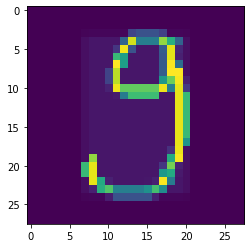

In [31]:
results = []
for i in images:
    i = 'test_images/' + i
    test_image = cv2.imread(i, 0)
    test_image = image_preprocesser(test_image)
    result = model.predict(test_image)
    results.append([np.argmax(result), max(result[0])])

In [32]:
results

[[0, 0.9894685],
 [1, 0.99999917],
 [8, 0.6186231],
 [2, 0.94037503],
 [8, 0.59136903],
 [4, 0.9998004],
 [4, 0.9996736],
 [5, 0.9995943],
 [5, 0.99937314],
 [6, 0.83436525],
 [6, 0.9935761],
 [7, 0.8546078],
 [4, 0.645858],
 [8, 1.0],
 [8, 0.9997633],
 [9, 0.91419715],
 [9, 0.87106496]]